## Explanation of each variables (source: <a href='hhtps://www.google.com' target='blank'>Kaggle<a> )    
        

<b>customerID</b> : Customer ID   
<b>gender</b> : Whether the customer is a male or a female   
<b>SeniorCitizen</b> : Whether the customer is a senior citizen or not (1, 0)   
<b>Partner</b> : Whether the customer has a partner or not (Yes, No)   
<b>Dependents</b> : Whether the customer has dependents or not (Yes, No)   
<b>tenure</b> : Number of months the customer has stayed with the company  
<b>PhoneService</b> : Whether the customer has a phone service or not (Yes, No)   
<b>MultipleLines</b> : Whether the customer has multiple lines or not (Yes, No, No phone service)   
<b>InternetService</b> : Customer’s internet service provider (DSL, Fiber optic, No)   
<b>OnlineSecurity</b> : Whether the customer has online security or not (Yes, No, No internet service)   
<b>OnlineBackup</b> : Whether the customer has online backup or not (Yes, No, No internet service)   
<b>DeviceProtection</b> : Whether the customer has device protection or not (Yes, No, No internet service)   
<b>TechSupport</b> : Whether the customer has tech support or not (Yes, No, No internet service)   
<b>StreamingTV</b> : Whether the customer has streaming TV or not (Yes, No, No internet service)   
<b>StreamingMovies</b> : Whether the customer has streaming movies or not (Yes, No, No internet service)   
<b>Contract</b> : The contract term of the customer (Month-to-month, One year, Two year)   
<b>PaperlessBilling</b> : Whether the customer has paperless billing or not (Yes, No)   
<b>PaymentMethod</b> : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))   
<b>MonthlyCharges</b> : The amount charged to the customer monthly   
<b>TotalCharges</b> : The total amount charged to the customer   

### Churn : Whether the customer churned or not (Yes or No)

<hr>

In [1]:
# linear algebra
import numpy as np

# Data Processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# Warning
import warnings
warnings.filterwarnings("ignore")

# ML-Models
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

print('Everything was imported successfully...')

C:\Users\dadyf\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Everything was imported successfully...


<hr>

In [2]:
df = pd.read_csv(r'data/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [6]:
df['TotalCharges'].isnull().sum()

11

In [7]:
df.dropna(axis=0, inplace=True, subset=['TotalCharges'])

In [8]:
df.shape

(7032, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
print('Churn quantity in the dataset')
df['Churn'].value_counts().to_frame()

Churn quantity in the dataset


,Churn
No,5163
Yes,1869


In [12]:
def plot_annotation(y_axis, ax, data, weight='bold', color='white', fontsize=14, figname='default'):
    total = len(data[y_axis])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width()/2 # + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), clip_on=True, weight=weight, color=color, fontsize=fontsize)

    plt.savefig(r'img/'+figname,bbox_inches='tight')

In [13]:
def plot_bar(y_axis,data, hue = None ,title=None, figsize=(7,5) , weight='bold', color='white', fontsize=14, figname='default' ):
    plt.style.use('ggplot')
    sns.set(style="ticks", color_codes=True)
    fig, axes = plt.subplots(figsize = figsize)
    ax = sns.countplot(y=y_axis, data=data, hue=hue)
    ax.set_title(title)
    plot_annotation(y_axis, ax, data, weight, color, fontsize, figname)

In [14]:
charges_churn_no = df[df['Churn']=='No']['MonthlyCharges'].sum()
charges_churn_yes = df[df['Churn']=='Yes']['MonthlyCharges'].sum()
charges_churn = df.MonthlyCharges.sum()
print(f'Revenu sur la période:  {round(charges_churn,1)}\nRevenu des churners: {charges_churn_yes}\nRevenu des loyaux: {charges_churn_no}\nPerte future: {round((charges_churn_yes/charges_churn)*100,2)}%')

Revenu sur la période:  455661.0
Revenu des churners: 139130.85
Revenu des loyaux: 316530.15
Perte future: 30.53%


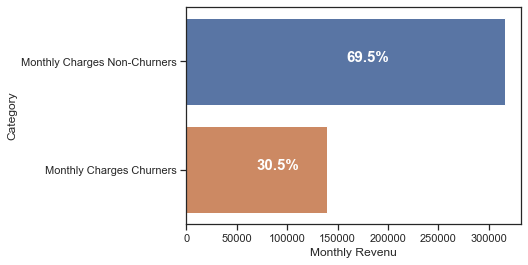

In [15]:
#df.groupby('Mo').sum()
#dataa = {'Monthly Charges Churners':df[df['Churn']=='Yes']['MonthlyCharges'].sum(),'Monthly Charges Non-Churners':df[df['Churn']=='No']['MonthlyCharges'].sum()}
dataa = {'Category':['Monthly Charges Churners','Monthly Charges Non-Churners'],'Monthly Revenu':[df[df['Churn']=='Yes']['MonthlyCharges'].sum(),df[df['Churn']=='No']['MonthlyCharges'].sum()]}
frame = pd.DataFrame(dataa)
#frame.plot(kind='bar')
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)
ax = sns.barplot(x='Monthly Revenu',y='Category',data=frame, order=['Monthly Charges Non-Churners','Monthly Charges Churners'])

total = charges_churn
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()/2 # + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), clip_on=True, weight='bold', color='white', fontsize=15)

plt.savefig(r'img/'+'MonthlyRevenue',bbox_inches='tight')


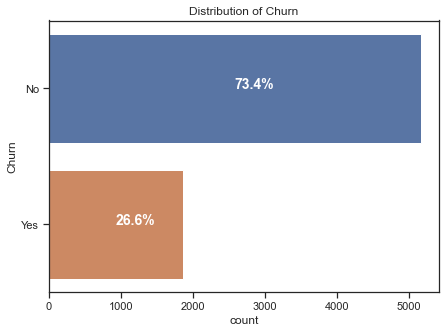

In [16]:
plot_bar('Churn',df,None, 'Distribution of Churn', (7,5),'bold', 'white', 14, 'dist_churn.png')

In [17]:
services = df.columns[6:15].to_list()
services_1 = df.columns[6:8].to_list() + df.columns[9:15].to_list()
type(services_1)

list

In [18]:
for i in services_1:
    df[i]  = df[i].replace({'No internet service' : 'No'})
    df[i]  = df[i].replace({'No phone service' : 'No'})

In [19]:
df_all = [df[df[i] == 'Yes'] for i in services_1] + [df[df['InternetService']!='No']]

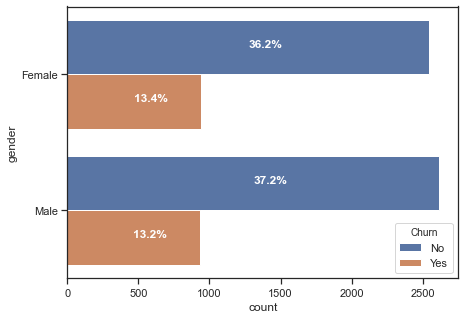

In [20]:
plot_bar('gender',df,'Churn',None, (7,5),'bold', 'white', 12, 'dist_churn_1.png')

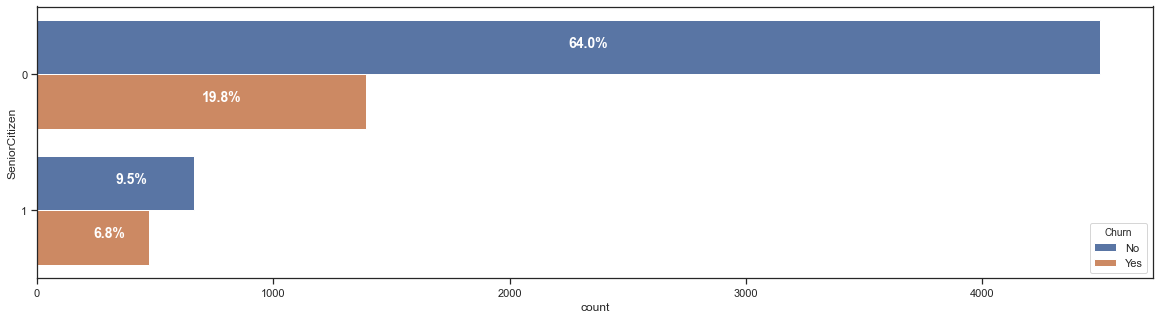

In [21]:
plot_bar('SeniorCitizen',df,'Churn',None, (20,5),'bold', 'white', 14, 'dist_churn_2.png')

---

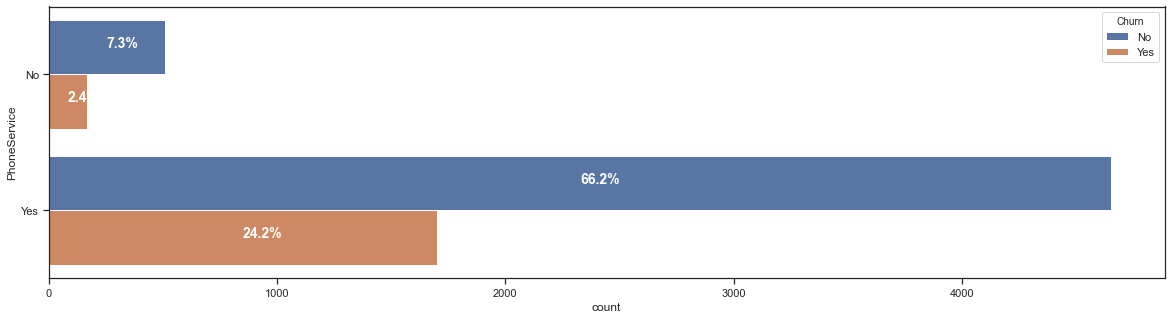

In [22]:
plot_bar('PhoneService',df,'Churn',None, (20,5),'bold', 'white', 14, 'dist_churn_PS.png')

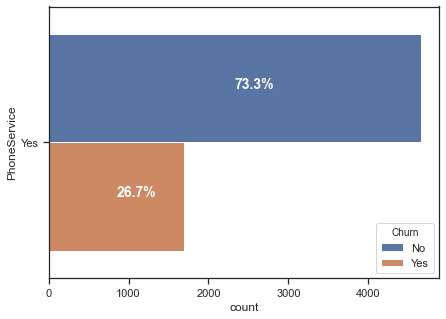

In [23]:
plot_bar('PhoneService',df[df['PhoneService']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PS_Yes.png')

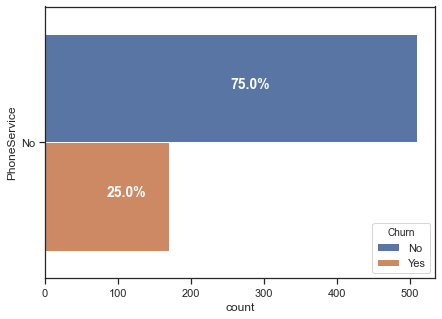

In [24]:
plot_bar('PhoneService',df[df['PhoneService']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PS_No.png')

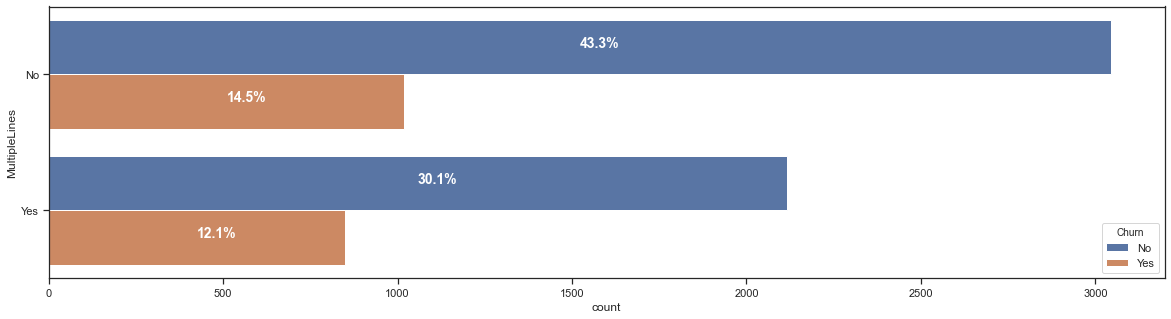

In [25]:
plot_bar('MultipleLines',df,'Churn',None, (20,5),'bold', 'white', 14, 'dist_churn_ML.png')

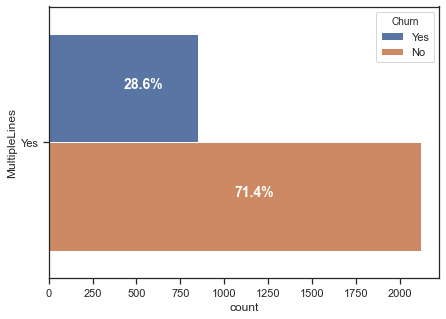

In [26]:
plot_bar('MultipleLines',df[df['MultipleLines']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_ML_Yes.png')

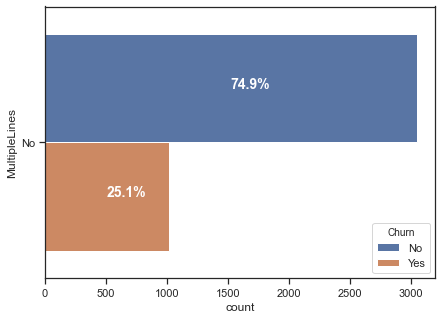

In [27]:
plot_bar('MultipleLines',df[df['MultipleLines']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_ML_No.png')

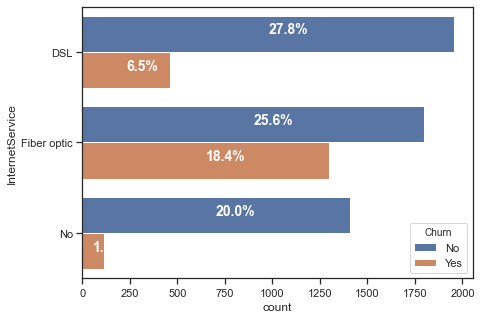

In [28]:
plot_bar('InternetService',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_IS.png')

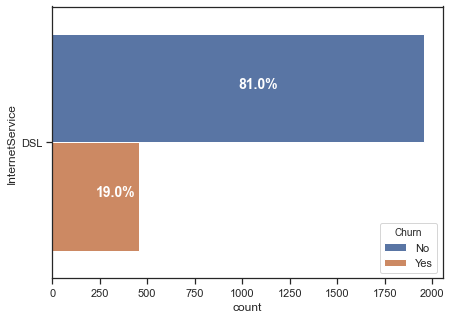

In [29]:
plot_bar('InternetService',df[df['InternetService']=='DSL'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_IS_DSL.png')

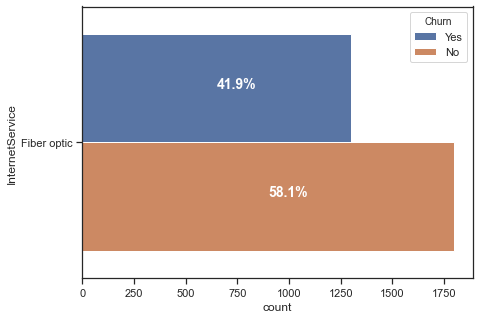

In [30]:
plot_bar('InternetService',df[df['InternetService']=='Fiber optic'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_IS_Fiber.png')

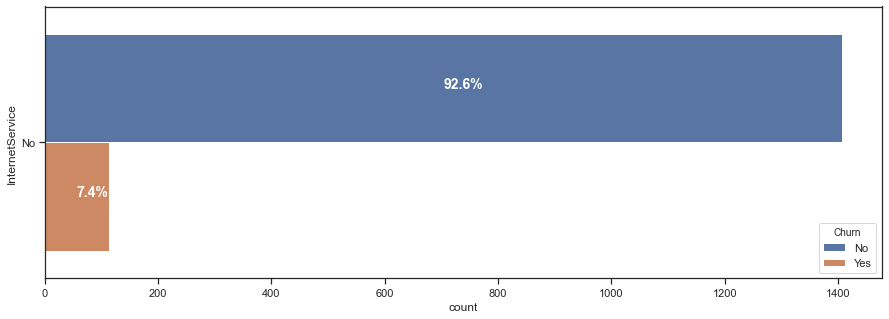

In [31]:
plot_bar('InternetService',df[df['InternetService']=='No'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_IS_No.png')

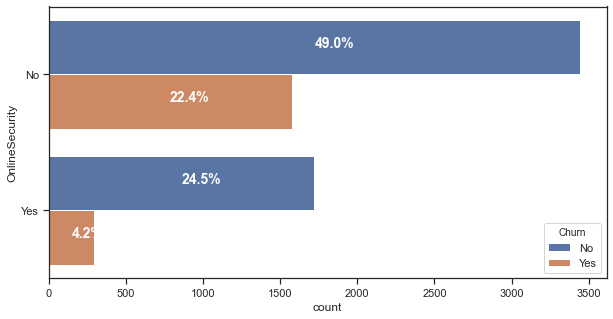

In [32]:
plot_bar('OnlineSecurity',df,'Churn',None, (10,5),'bold', 'white', 14, 'dist_churn_OS.png')

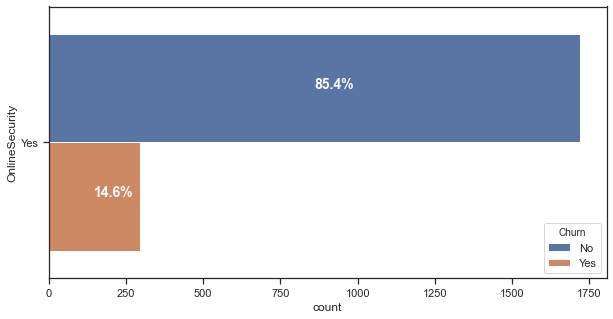

In [33]:
plot_bar('OnlineSecurity',df[df['OnlineSecurity']=='Yes'],'Churn',None, (10,5),'bold', 'white', 14, 'dist_churn_OS_Yes.png')

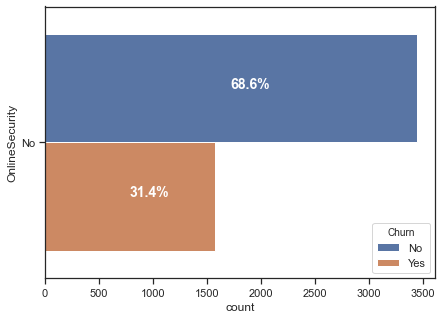

In [34]:
plot_bar('OnlineSecurity',df[df['OnlineSecurity']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_OS_No.png')

plot_bar('OnlineSecurity',df[df['OnlineSecurity']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_OS_NoIS.png')

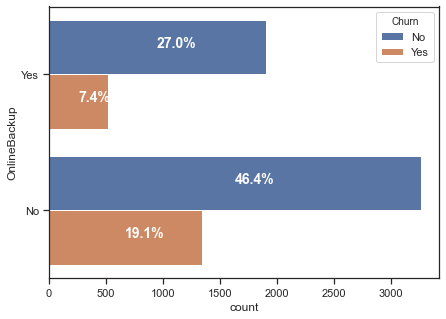

In [35]:
plot_bar('OnlineBackup',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_OB.png')

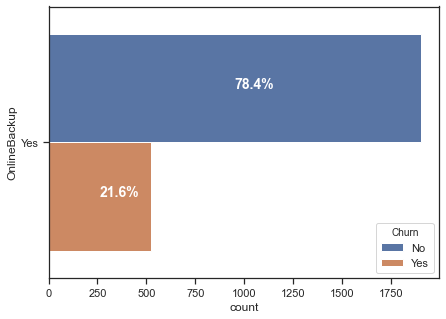

In [36]:
plot_bar('OnlineBackup',df[df['OnlineBackup']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_OB_Yes.png')

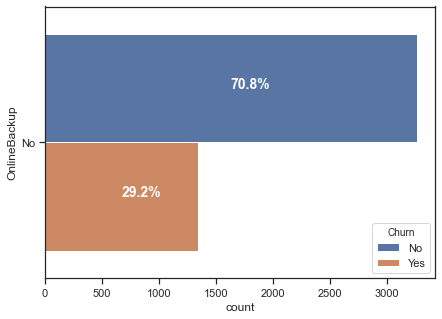

In [37]:
plot_bar('OnlineBackup',df[df['OnlineBackup']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_OB_No.png')

plot_bar('OnlineBackup',df[df['OnlineBackup']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_OB_NoIS.png')

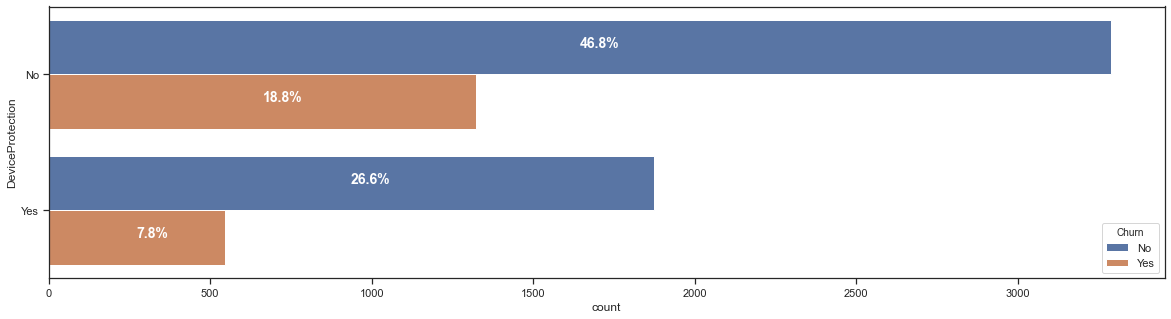

In [38]:
plot_bar('DeviceProtection',df,'Churn',None, (20,5),'bold', 'white', 14, 'dist_churn_DP.png')

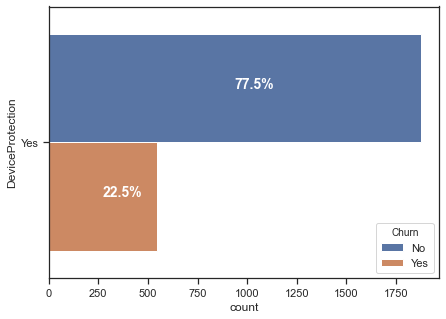

In [39]:
plot_bar('DeviceProtection',df[df['DeviceProtection']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_DP_Yes.png')

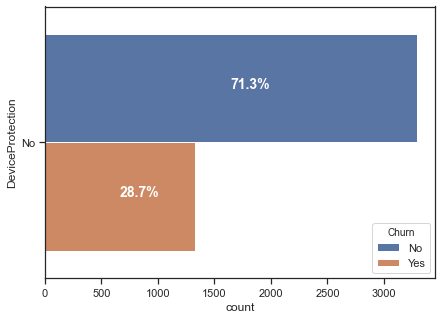

In [40]:
plot_bar('DeviceProtection',df[df['DeviceProtection']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_DP_No.png')

plot_bar('DeviceProtection',df[df['DeviceProtection']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_DP_NoIS.png')

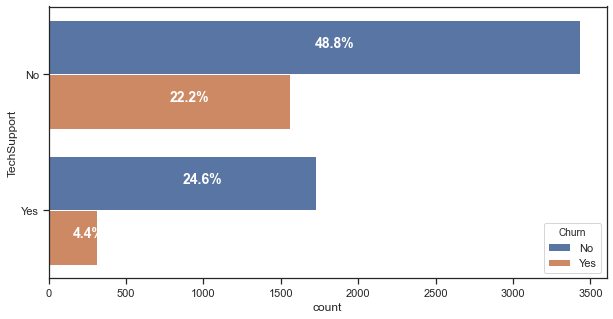

In [41]:
plot_bar('TechSupport',df,'Churn',None, (10,5),'bold', 'white', 14, 'dist_churn_TS.png')

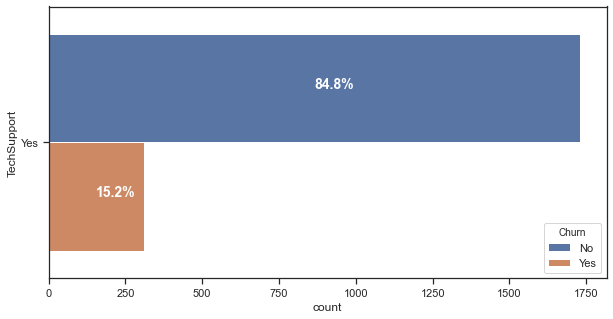

In [42]:
plot_bar('TechSupport',df[df['TechSupport']=='Yes'],'Churn',None, (10,5),'bold', 'white', 14, 'dist_churn_TS_Yes.png')

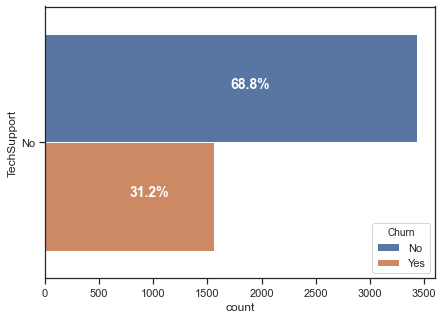

In [43]:
plot_bar('TechSupport',df[df['TechSupport']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_TS_No.png')

plot_bar('TechSupport',df[df['TechSupport']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_TS_NoIS.png')

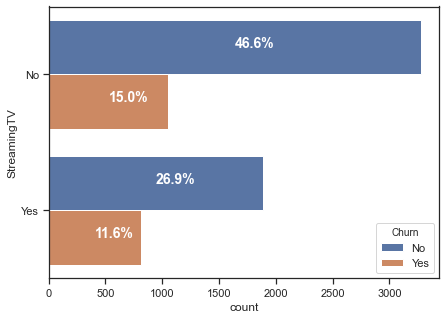

In [44]:
plot_bar('StreamingTV',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_ST.png')

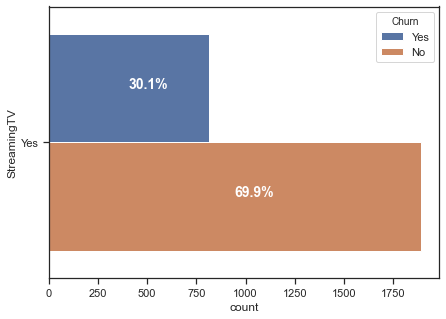

In [45]:
plot_bar('StreamingTV',df[df['StreamingTV']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_ST_Yes.png')

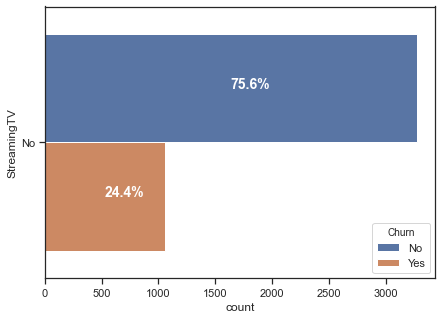

In [46]:
plot_bar('StreamingTV',df[df['StreamingTV']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_ST_No.png')

plot_bar('StreamingTV',df[df['StreamingTV']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_ST_NoIS.png')

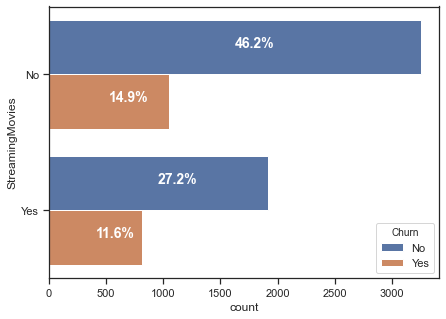

In [47]:
plot_bar('StreamingMovies',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_SM.png')

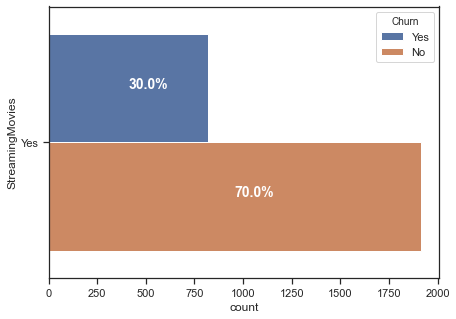

In [48]:
plot_bar('StreamingMovies',df[df['StreamingMovies']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_SM_Yes.png')

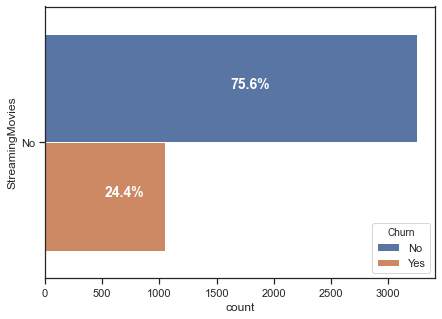

In [49]:
plot_bar('StreamingMovies',df[df['StreamingMovies']=='No'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_SM_No.png')

plot_bar('StreamingMovies',df[df['StreamingMovies']=='No internet service'],'Churn',None, (15,5),'bold', 'white', 14, 'dist_churn_SM_NoIS.png')

---

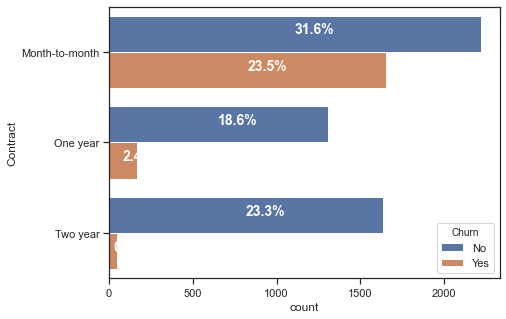

In [50]:
plot_bar('Contract',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_Con.png')

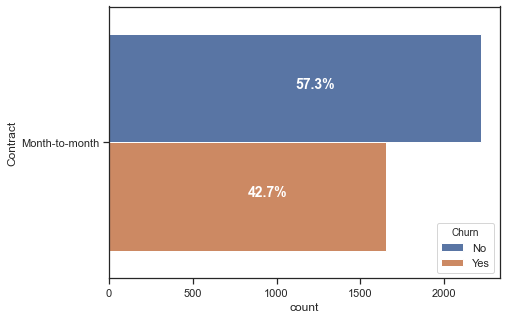

In [51]:
plot_bar('Contract',df[df['Contract']=='Month-to-month'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_Con_MM.png')

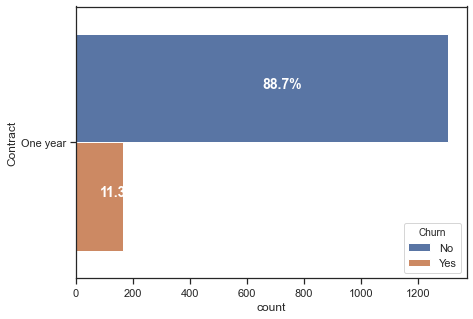

In [52]:
plot_bar('Contract',df[df['Contract']=='One year'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_Con_OY.png')

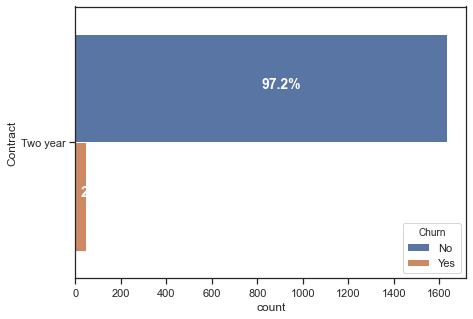

In [53]:
plot_bar('Contract',df[df['Contract']=='Two year'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_Con_TY.png')

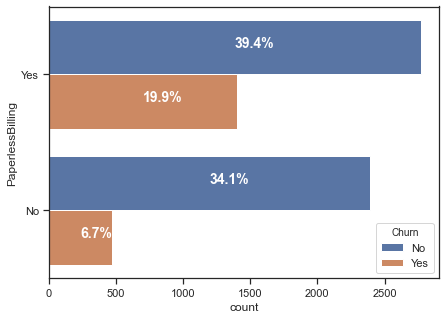

In [54]:
plot_bar('PaperlessBilling',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PB.png')

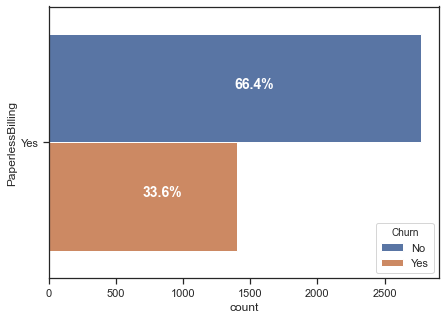

In [55]:
plot_bar('PaperlessBilling',df[df['PaperlessBilling']=='Yes'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PB_Yes.png')

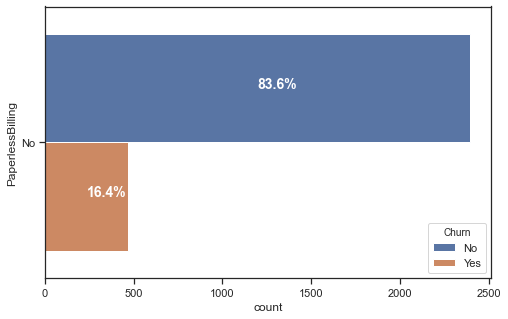

In [56]:
plot_bar('PaperlessBilling',df[df['PaperlessBilling']=='No'],'Churn',None, (8,5),'bold', 'white', 14, 'dist_churn_PB_No.png')

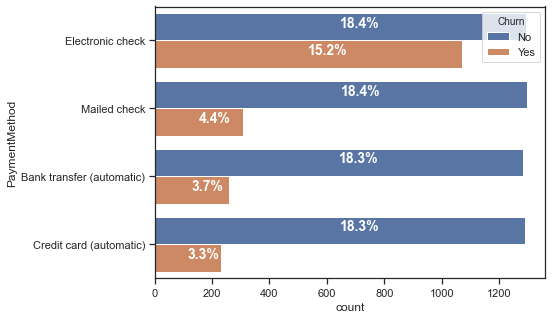

In [57]:
plot_bar('PaymentMethod',df,'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PM.png')

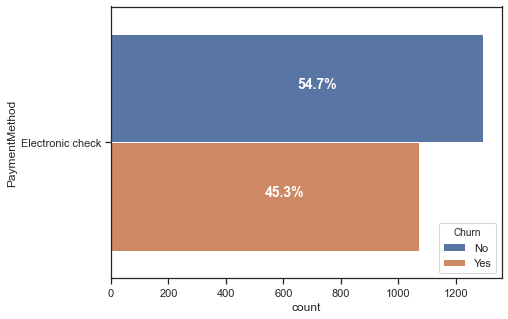

In [58]:
plot_bar('PaymentMethod',df[df['PaymentMethod']=='Electronic check'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PM_EC.png')

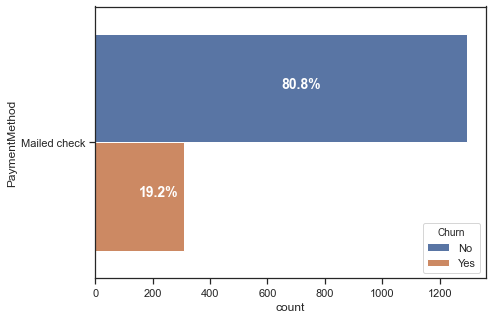

In [59]:
plot_bar('PaymentMethod',df[df['PaymentMethod']=='Mailed check'],'Churn',None, (7,5),'bold', 'white', 14, 'dist_churn_PM_MC.png')

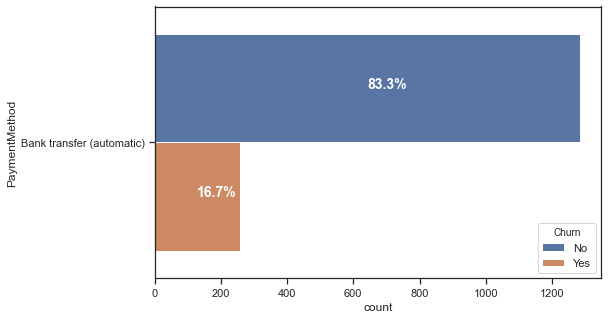

In [60]:
plot_bar('PaymentMethod',df[df['PaymentMethod']==r'Bank transfer (automatic)'],'Churn',None, (8,5),'bold', 'white', 14, 'dist_churn_PM_BT.png')

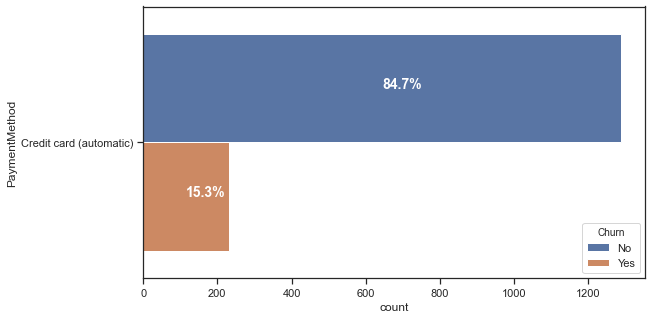

In [61]:
plot_bar('PaymentMethod',df[df['PaymentMethod']==r'Credit card (automatic)'],'Churn',None, (9,5),'bold', 'white', 14, 'dist_churn_PM_CC.png')

---

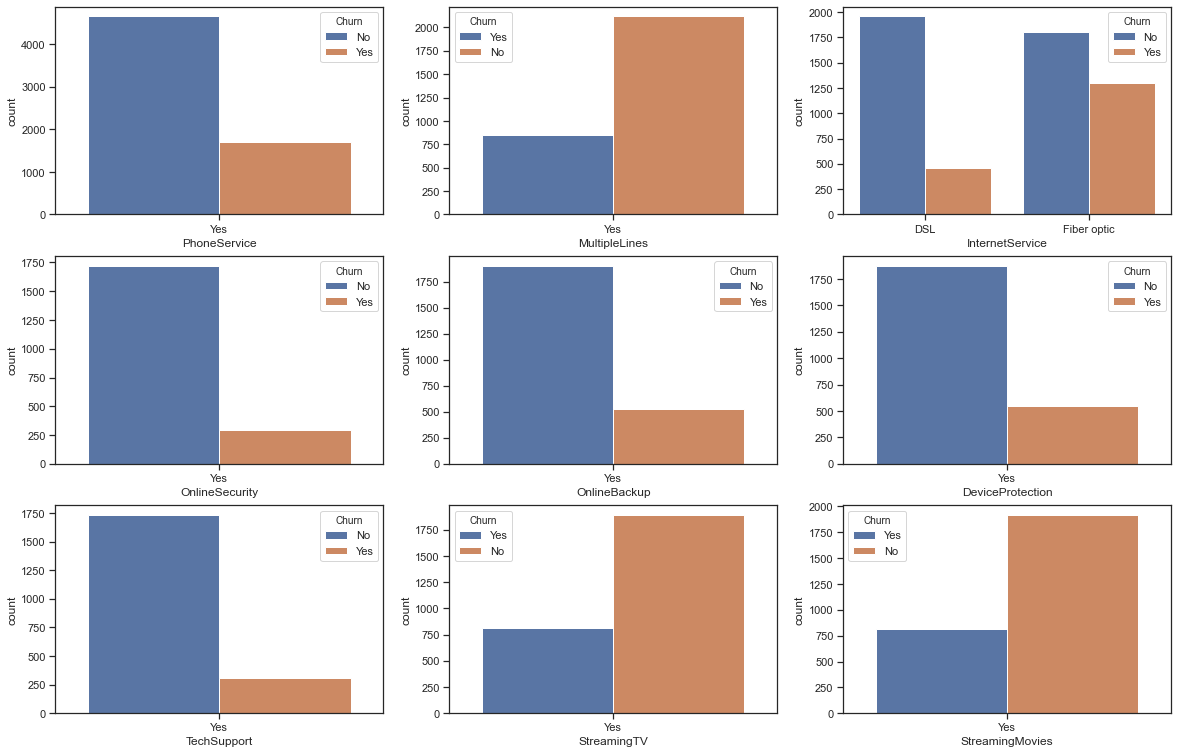

In [62]:
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 3
                         ,figsize = (20,13))

sns.countplot(x = "PhoneService", hue = 'Churn',data=df[df['PhoneService']=='Yes'],ax=axes[0][0]) #data = df_all[0], ax=axes[0][0])
sns.countplot(x = "MultipleLines", hue = 'Churn',data=df[df['MultipleLines']=='Yes'],ax=axes[0][1]) #data = df_all[1], ax=axes[0][1])
sns.countplot(x = "InternetService", hue = 'Churn',data = df_all[-1], ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", hue = 'Churn', data = df_all[2], ax=axes[1][0])
sns.countplot(x = "OnlineBackup", hue = 'Churn', data = df_all[3], ax=axes[1][1])
sns.countplot(x = "DeviceProtection", hue = 'Churn', data = df_all[4], ax=axes[1][2])
sns.countplot(x = "TechSupport", hue = 'Churn', data = df_all[5], ax=axes[2][0])
sns.countplot(x = "StreamingTV", hue = 'Churn', data = df_all[6], ax=axes[2][1])
sns.countplot(x = "StreamingMovies", hue = 'Churn', data = df_all[7], ax=axes[2][2])

#sns.countplot(x = "Contract", data = df_1, ax=axes[4][0])
#sns.countplot(x = "PaperlessBilling", data = df_1, ax=axes[4][1])
#sns.countplot(x = "PaymentMethod", data = df_1, ax=axes[4][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig(r'img/dist_churn_4.png',bbox_inches='tight')

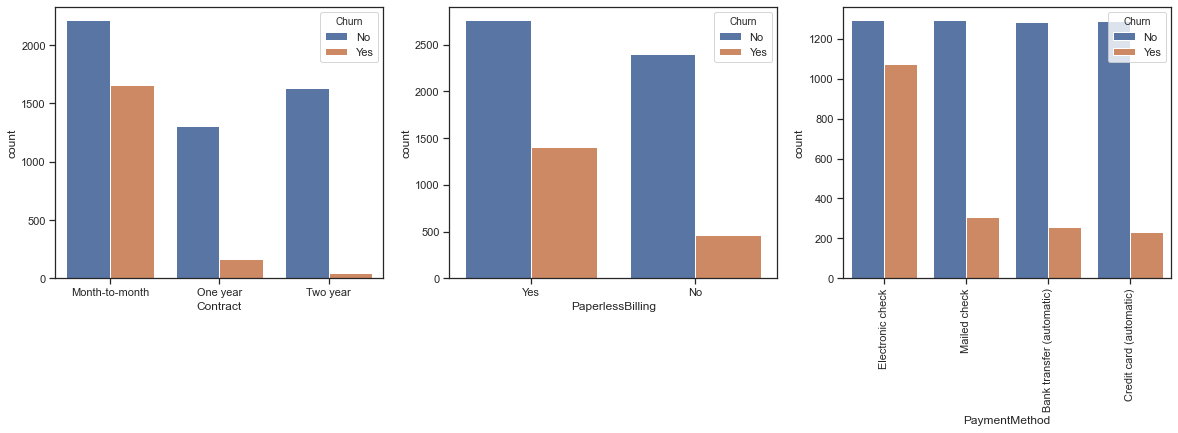

In [63]:
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 1,ncols = 3
                         ,figsize = (20,5))

sns.countplot(x = "Contract", hue='Churn', data = df, ax=axes[0])
sns.countplot(x = "PaperlessBilling", hue='Churn', data = df, ax=axes[1])
ax = sns.countplot(x = "PaymentMethod", hue='Churn', data = df, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.savefig(r'img/dist_churn_5.png',bbox_inches='tight')

## Let's dive in into the CHURN world in order to get some insights

In [64]:
df_churn_yes = df[df['Churn']=='Yes']
print('Successfully created the new dataframe!')

Successfully created the new dataframe!


In [65]:
df_churn_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


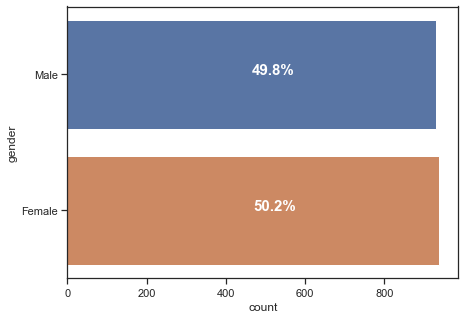

In [66]:
range = 1
plot_bar(df_churn_yes.columns[range],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

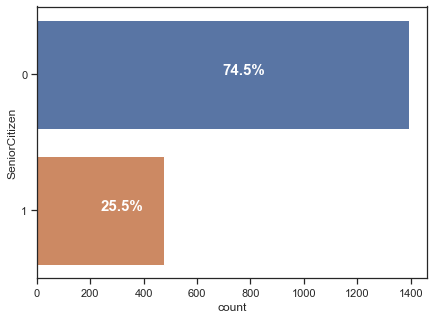

In [67]:
range = 2
plot_bar(df_churn_yes.columns[range],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

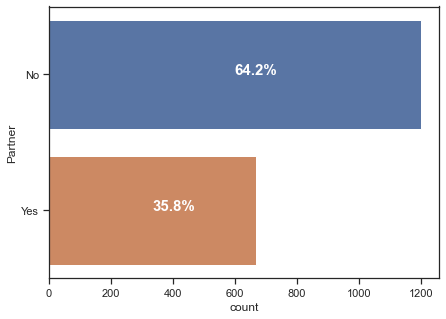

In [68]:
range = 3
plot_bar(df_churn_yes.columns[3],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

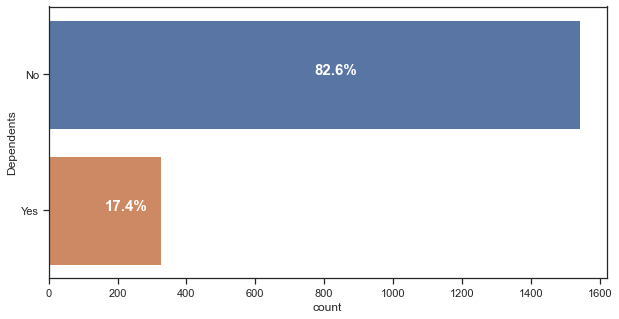

In [69]:
range = 4
plot_bar(df_churn_yes.columns[4],df_churn_yes,None,None, (10,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

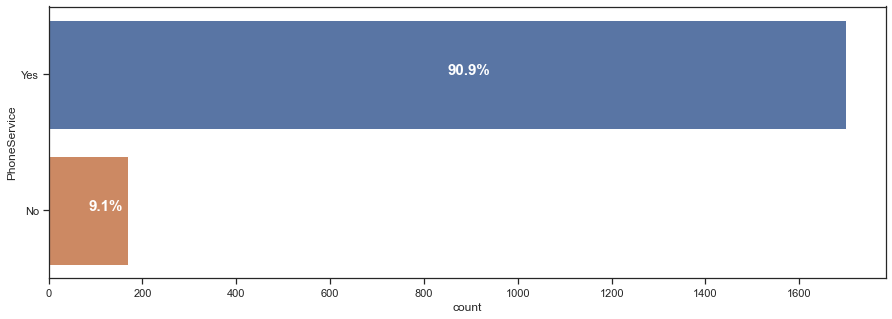

In [70]:
range = 6
plot_bar(df_churn_yes.columns[6],df_churn_yes,None,None, (15,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

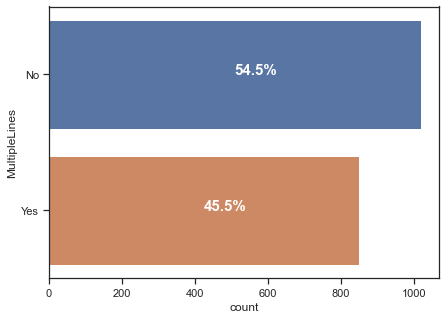

In [71]:
range = 7
plot_bar(df_churn_yes.columns[7],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

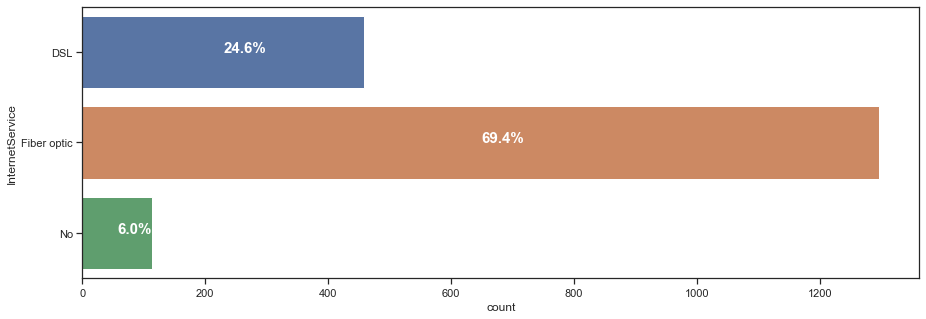

In [72]:
range = 8
plot_bar(df_churn_yes.columns[8],df_churn_yes,None,None, (15,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

In [73]:
df_churn_yes.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

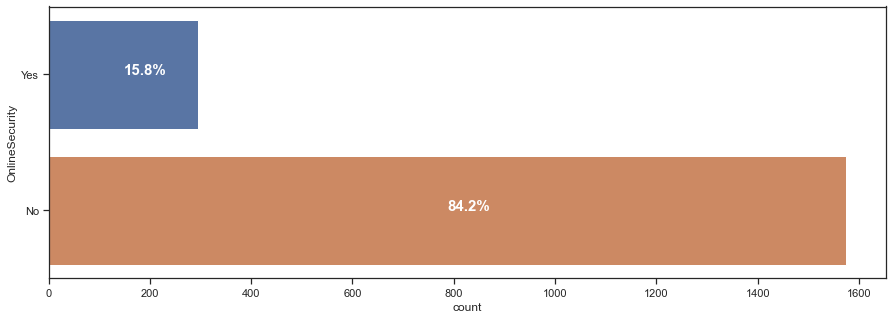

In [74]:
range = 9
plot_bar(df_churn_yes.columns[9],df_churn_yes,None,None, (15,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

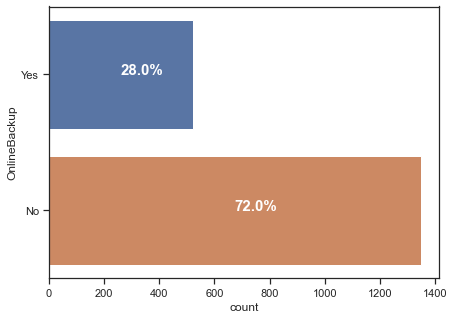

In [75]:
range = 10
plot_bar(df_churn_yes.columns[10],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

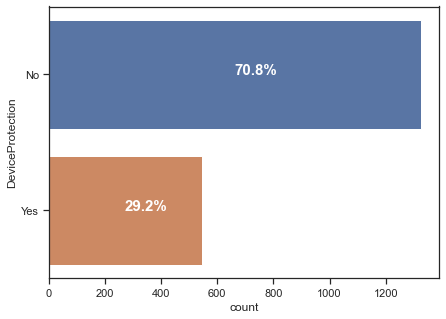

In [76]:
range = 11
plot_bar(df_churn_yes.columns[11],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

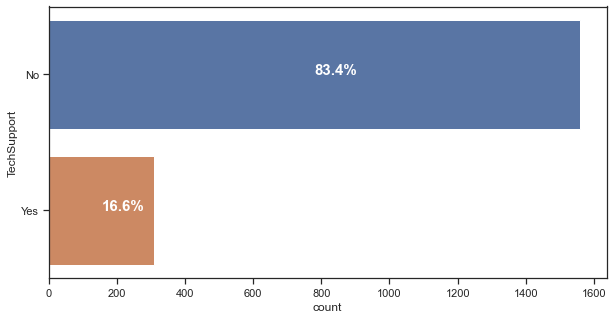

In [77]:
range = 12
plot_bar(df_churn_yes.columns[12],df_churn_yes,None,None, (10,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

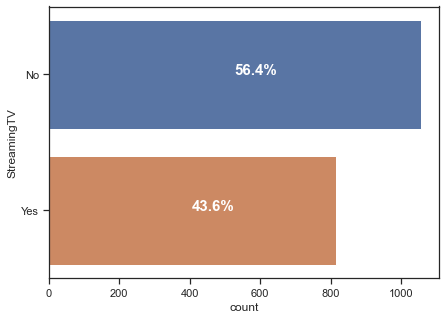

In [78]:
range = 13
plot_bar(df_churn_yes.columns[13],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

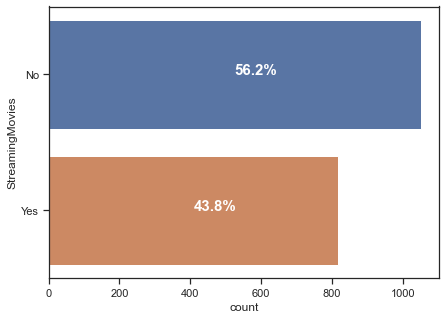

In [79]:
range = 14
plot_bar(df_churn_yes.columns[14],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

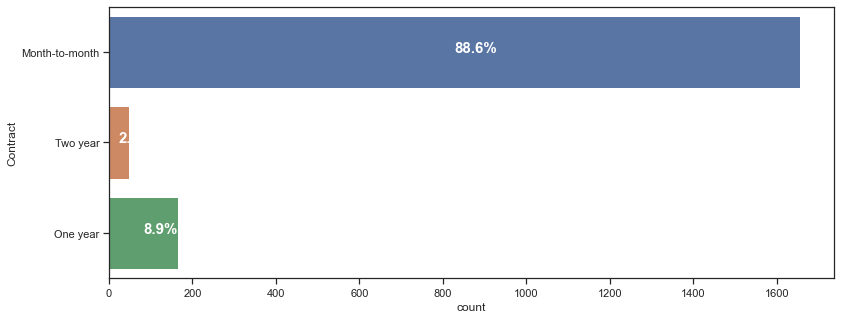

In [80]:
range = 15
plot_bar(df_churn_yes.columns[15],df_churn_yes,None,None, (13,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

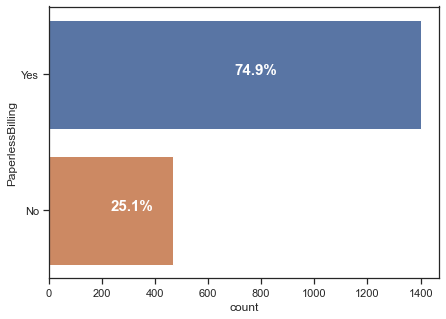

In [81]:
range = 16
plot_bar(df_churn_yes.columns[16],df_churn_yes,None,None, (7,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

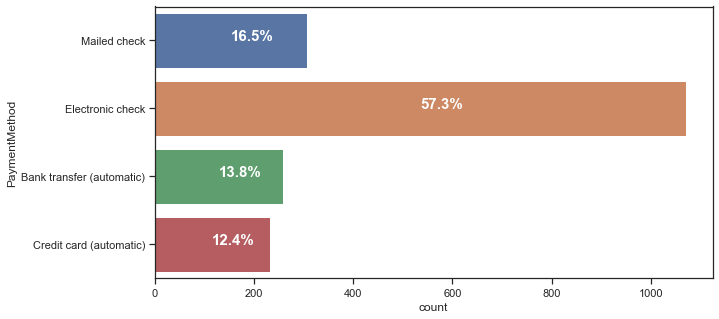

In [82]:
range = 17
plot_bar(df_churn_yes.columns[17],df_churn_yes,None,None, (10,5),'bold', 'white', 15, df_churn_yes.columns[range]+'.png')

plot_bar(df_churn_yes.columns[1],df_churn_yes,None,None, (7,5),'bold', 'white', 15, 'dist_churn_11.png')

In [83]:
df_all [-1].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


val_dict = dict(service_name=[],Total=[])
val= ['DeviceProtection','InternetService','OnlineSecurity']
for name in val:
    val = df_all[-][name].count()
    val_dict['service_name'].append(name)
    val_dict['Total'].append(val)
df_10 = pd.DataFrame(val_dict) 
df_10.plot(kind="bar",x="service_name",y="Total")

In [84]:
val_dict = dict(service_name=[],Total=[])

In [85]:

val_dict

{'service_name': [], 'Total': []}

In [86]:
val = df_all [-1]['OnlineSecurity'].count()
val_dict['service_name'].append('OnlineSecurity')
val_dict['Total'].append (val)
val_dict


{'service_name': ['OnlineSecurity'], 'Total': [5512]}

In [87]:
df_10 = pd.DataFrame(val_dict)

df_10.plot(kind="bar",x="service_name",y="Total")

In [88]:
set(df.InternetService)

{'DSL', 'Fiber optic', 'No'}

In [89]:
dict_map ={'DSL': 'Yes','Fiber optic': 'Yes'}

In [90]:
df.InternetService = df['InternetService'].replace(dict_map)

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
val_dict = dict(service_name=[],Total=[])
val= df.columns[6:15].to_list()#['DeviceProtection','InternetService','OnlineSecurity']
for name in val:
    val= df[df.Churn =='Yes'].copy()
    val =val[val[name] =='Yes'][name].count()
    
    val_dict['service_name'].append(name)
    val_dict['Total'].append(val)


In [93]:
print(val)


818


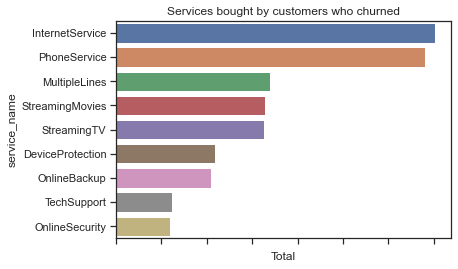

In [94]:
df_10 = pd.DataFrame(val_dict).sort_values(by=['Total'],ascending=False) 

#df_10.plot(kind="barh",x="service_name",y="Total")
ax = sns.barplot(y='service_name',data=df_10,x='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Services bought by customers who churned')
#ax.set_xlabel(None)
#ax.set_color('red')
plt.savefig(r'img/fig.png',bbox_inches='tight')

Text(0.5, 0, '')

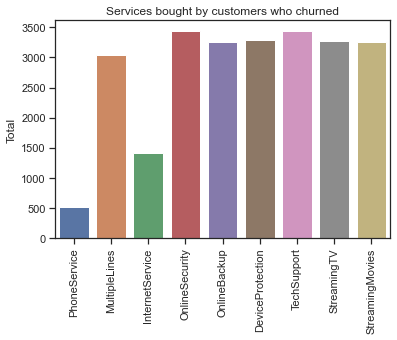

In [95]:
val_dict1 = dict(service_name=[],Total=[])
val1= df.columns[6:15].to_list()#['DeviceProtection','InternetService','OnlineSecurity']
for name in val1:
    val1= df[df.Churn =='No'].copy()
    val1 =val1[val1[name] =='No'][name].count()
    
    val_dict1['service_name'].append(name)
    val_dict1['Total'].append(val1)
    

    
df_11 = pd.DataFrame(val_dict1) 
#df_10.plot(kind="barh",x="service_name",y="Total")
ax = sns.barplot(x='service_name',data=df_11,y='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Services bought by customers who churned')
ax.set_xlabel(None)

values = np.array([2,5,3,6,4,7,1])   
idx = np.array(list('abcdefg')) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

Text(0.5, 1.0, 'Tenure Chart by Churn')

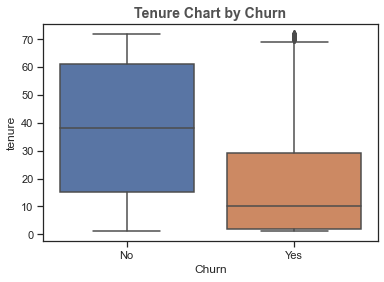

In [96]:
# Tenure Chart by Churn

ax = sns.boxplot(x = df.Churn, y = df.tenure)
ax.set_title('Tenure Chart by Churn', fontsize=14, weight='bold', alpha=0.8)

We can see, it is obvious in the main graph, the bars are most noteworthy at 70 months and then under 10 months. This may imply that most clients who remain with the organization are either new ones or ones that have been with the organization for around 6 years, i.e their most faithful clients. 

Customers who have been with the company for a long time tend to stay.

Consequently, on the other hand, if we take a look at clients who have stopped, they are the most noteworthy in the initial months. 

Our data consist of only 3 features which are contiguous. The remainder of our features is categorical. For any sort of examination, we have to encode the categorical features. 

We do this utilizing the Label Encoder package. 

The feature __customerID__ is unique and isn't helpful to us. Thus, we do not consider it in our analysis.

---

In [97]:
#transforming the data

df = df.drop('customerID',axis=1)
df = df.apply(LabelEncoder().fit_transform)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,1,1,0,1,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,0,1,1,0,1,1,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


In order to have a look at the correlation between our variables, we decided to look at the correlation plot using the Pearson Method.

We have a lot of variables in our dataset. This isn't really a good way to look at the correlation matrix. So, we plotted the Heatmap.

In [98]:
df.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.004745,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,0.182519,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000286,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,-0.138383,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.037529,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.171817,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.210794,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.508640,0.470862,0.040033
InternetService,-0.004745,0.182519,0.000286,-0.138383,0.037529,-0.171817,0.210794,1.000000,0.332799,0.380990,0.380151,0.335695,0.414951,0.418450,-0.241574,0.320592,-0.125799,0.704318,0.385919,0.227578
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,0.332799,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.278448,0.410534,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.380990,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.436017,0.493486,-0.082307


(20.5, -0.5)

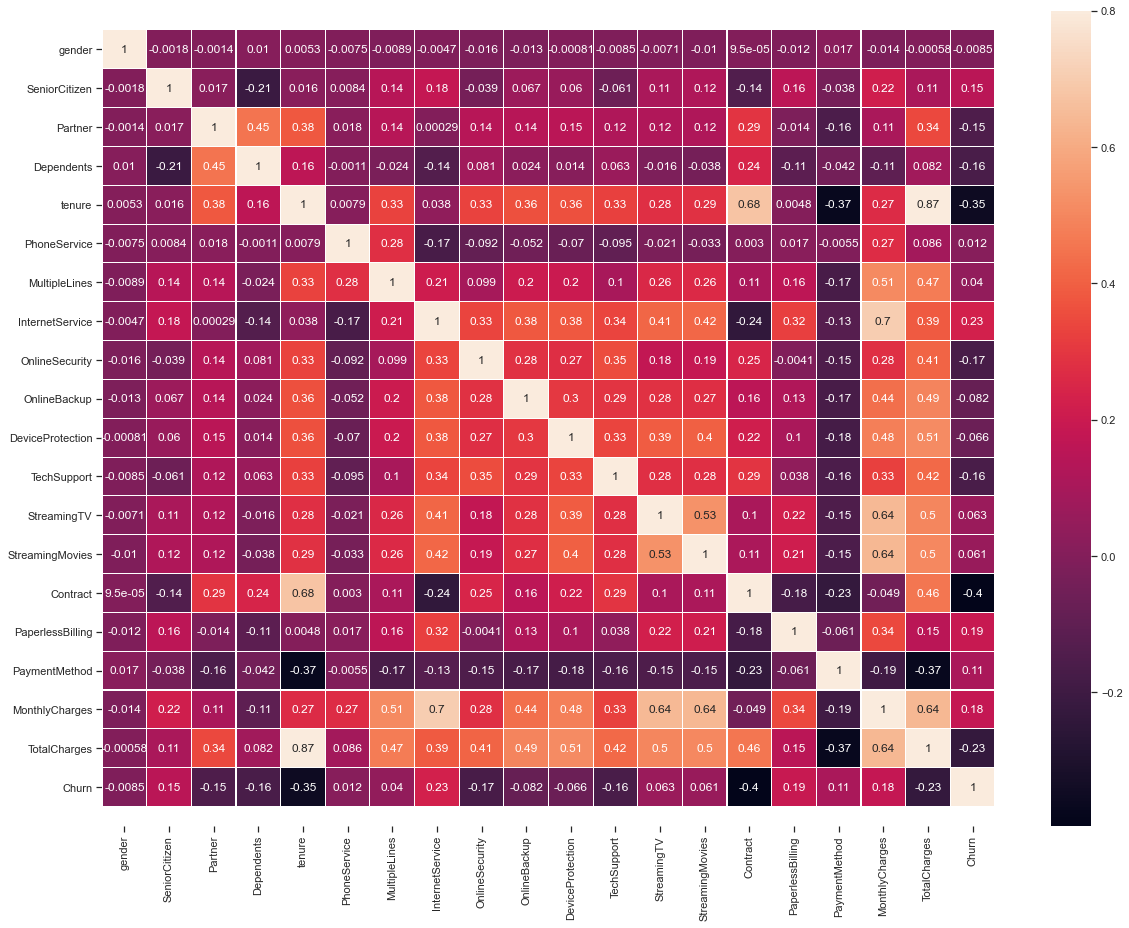

In [99]:
# Correlation Plot
corrmat = df.corr(method="pearson")

#Set uo the matplolib figure
plt.subplots(figsize=(20, 15))

#Draw the heatmap using seaborn
ax = sns.heatmap(corrmat, linewidths=0.1, vmax=0.8, annot=True,
                xticklabels=corrmat.columns.values,
                yticklabels=corrmat.columns.values)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Variables like __TotalCharges__, __MonthlyCharges__ & __Tenure__ are the variables which seem highly correlated which seems obvious. __TotalCharges__ is nothing but __MonthlyCharges__ times __Tenure__. To avoid multicollinearity, we get rid of the __TotalCharges__ feature in our analysis.

### Data Preprocessing, Feature Selection & Feature Importance

As the first step in our data preprocessing, we split the data into Features & Target. After this we split our data into training, & testing. To bring the variables on the same scale, we standardize the data.

In [100]:
#Splitting the data into features & target

X = df.iloc[:,:-2]
y = df[["Churn"]]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

#scaling the data
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Our dataset consists of 18 features. In order to check whether there are any redundant variables to the model building process, we use a couple of methods.

- Feature Importance using Random Forest Classifier

- Recursive Feature Elimination using Logistic Regression Classifier

In [102]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, df.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.254838
tenure              0.235290
Contract            0.096813
PaymentMethod       0.065809
gender              0.033382
PaperlessBilling    0.030298
OnlineSecurity      0.029214
TechSupport         0.028392
Partner             0.027752
SeniorCitizen       0.025974
OnlineBackup        0.025871
DeviceProtection    0.024244
Dependents          0.023457
MultipleLines       0.023265
StreamingMovies     0.022516
InternetService     0.022009
StreamingTV         0.021117
PhoneService        0.009759
dtype: float64

As we can see, the features that contribute most to the customer's decision to either stick or change are __MonthlyCharges__ & __tenure__. To check if the features that contributed the least to feature importance can actually be eliminated from the model building process, we use Recursive Feature Elimination.

In [103]:
del range

Optimal number of features : 16


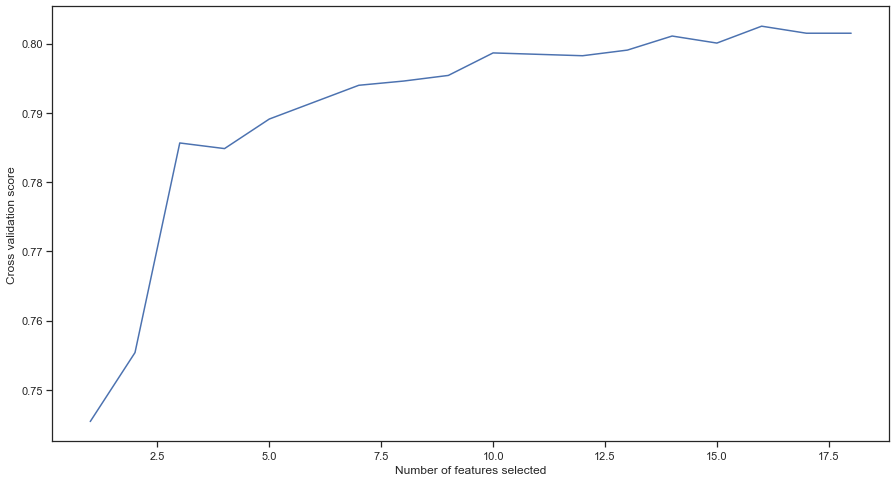

In [104]:
lr = LogisticRegression(penalty="l2",C=.1,random_state=0)

selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2), scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

The output of the RFE is surprising since it mentions that the optnmal number of variables are __15__. So we decided to include only __15__ variables in our analysis & move ahead.

So, we drop the variables which are not necessary!

In [105]:
X.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges']

In [106]:
'''
The optimal variables are represented as 1.
'''
print(selector.ranking_)

'''
The columns index which are not 1 must be dropped.
The index are 2, 12, 13.
And these index are 'Partner', 'StreamingTV','StreamingMovies'.
'''

X = X.drop(['Partner', 'StreamingTV','StreamingMovies'], axis=1)

[1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1]


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

## Implement Machine Learning Models

### Model Building & Comparison

We've used quite a few models to check which fits best on our data.

Models used are -

- Logistic Regression

- Random Forest Classifier

- Decision Tree Classifier

- kNN Classifier

- Gaussian Naive-Bayes

Our target variable is a binary variable. The customer either stays or leaves. Hence, we decided to use the Logistic Regression as our first model to check how the data fits the model. The models have been selected in no specific order.

### Model 1 - Logistic Regression

In [108]:
lr = LogisticRegression(penalty="l2",C=.1,random_state=0)
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.5 %
Test accuracy: 80.3 %


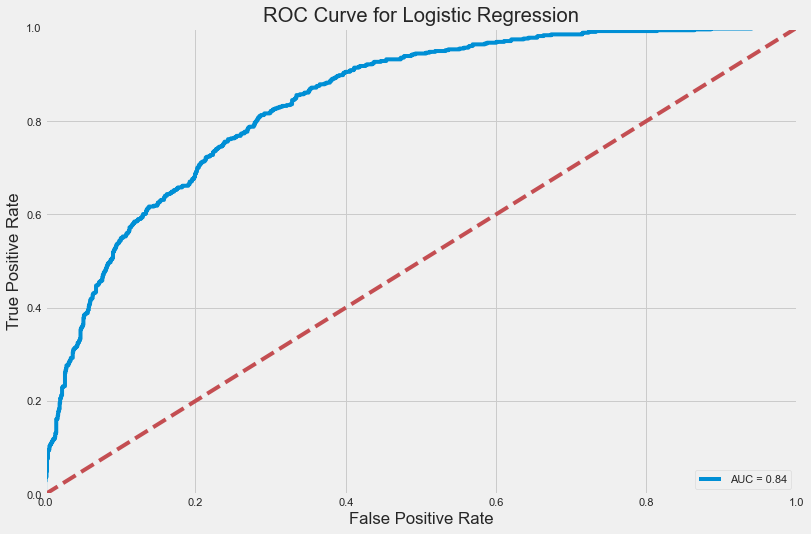

In [109]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))

plt.title("ROC Curve for Logistic Regression")
plt.plot(roc_data['fpr'], roc_data['tpr'], label = 'AUC = %0.2f' % auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
X_arr = X.values
y_arr = y.values.flatten()

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)

lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)

print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)

Logistic Regression score after using Cross Validation (k=10) is : 80.5 %


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



(2.5, -0.5)

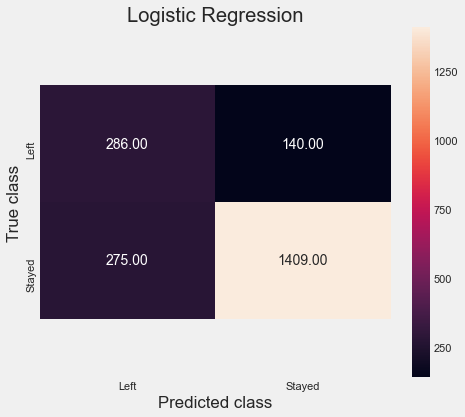

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(7,6))
ax = sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# okkk